In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
from numpy.random import randint
import itertools
seed(1)

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix , classification_report
from keras.metrics import Accuracy

Using TensorFlow backend.


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [5]:
# Function to plot the confusion Matrix
# Confusion Matrix func thanks to https://www.kaggle.com/pierra
# For later uses

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
model = Sequential()
model.add(Dense(10,input_shape=(6,),activation ='tanh'))
model.add(Dense(3,activation='softmax'))

In [7]:
## opt = SGD(learning_rate=0.01, momentum=0.0)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [9]:
## Initiate data frame train
d = {'x': [], 'x1': [],'x2': [], 'x3': [],'x4': [], 'x5': [],'geom':[],'aritmatik':[],'none':[]}
df = pd.DataFrame(data=d)
## generate random data
for i in range(500):
    k = randint(3)
    if k == 0:
        #generate geom
        a = randint(low = -200, high= 200)
        r = randint(low= -10,high=10)
        data = {'x':a, 'x1': a*r,'x2': a*r**2, 'x3': a*r**3,'x4': a*r**4, 'x5': a*r**5,'geom':1,'aritmatik':0,'none':0}
        df = df.append(data,ignore_index=True)
        
    elif k == 1:
        #generate aritmatik
        a = randint(low = -200, high= 200)
        b = randint(low= -50,high=50)
        data = {'x':a, 'x1': a+b,'x2': a+b*2, 'x3': a+b*3,'x4': a+b*4, 'x5': a+b*5,'geom':0,'aritmatik':1,'none':0}
        df = df.append(data,ignore_index=True)
    
    else:
        #generate geom
        a = randint(low = -1000, high= 1000,size =6)
        data = {'x':a[0], 'x1': a[1],'x2': a[2], 'x3': a[3],'x4': a[4], 'x5': a[5],'geom':0,'aritmatik':0,'none':1}
        df = df.append(data,ignore_index=True)

In [10]:
## Initiate data frame test
p = {'x': [], 'x1': [],'x2': [], 'x3': [],'x4': [], 'x5': [],'geom':[],'aritmatik':[],'none':[]}
df_try = pd.DataFrame(data=p)

seed(173)

for i in range(200):
    k = randint(3)
    if k == 0:
        #generate geom
        a = randint(low = -200, high= 200)
        r = randint(low= -10,high=10)
        data = {'x':a, 'x1': a*r,'x2': a*r**2, 'x3': a*r**3,'x4': a*r**4, 'x5': a*r**5,'geom':1,'aritmatik':0,'none':0}
        df_try = df_try.append(data,ignore_index=True)
        
    elif k == 1:
        #generate aritmatik
        a = randint(low = -200, high= 200)
        b = randint(low= -50,high=50)
        data = {'x':a, 'x1': a+b,'x2': a+b*2, 'x3': a+b*3,'x4': a+b*4, 'x5': a+b*5,'geom':0,'aritmatik':1,'none':0}
        df_try = df_try.append(data,ignore_index=True)
    
    else:
        #generate geom
        a = randint(low = -1000, high= 1000,size =6)
        data = {'x':a[0], 'x1': a[1],'x2': a[2], 'x3': a[3],'x4': a[4], 'x5': a[5],'geom':0,'aritmatik':0,'none':1}
        df_try = df_try.append(data,ignore_index=True)
        
X_test = df_try[['x','x1','x2','x3','x4','x5']]
y_test = df_try[['geom','aritmatik','none']]

In [11]:
X_train = df[['x','x1','x2','x3','x4','x5']]
y_train = df[['geom','aritmatik','none']]

In [12]:
scalar = RobustScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [13]:
type(X_train)

numpy.ndarray

In [14]:
model.fit(X_train, y_train,epochs = 500,validation_data=(X_test,y_test),verbose = 0)
# Evaluate your model 
print("Evaluation: \nLoss:",model.evaluate(X_test, y_test)[0],'\nAccuracy:',model.evaluate(X_test, y_test)[1]) 

200/200 [==============================] - 0s 40us/step
Evaluation: 
Loss: 0.19976267337799072 
Accuracy: 0.9399999976158142


In [15]:
y_predict = model.predict_proba(X_test)
y_preds = np.argmax(y_predict,axis =1)
y_test_arg = np.argmax(y_test.to_numpy(),axis = 1)

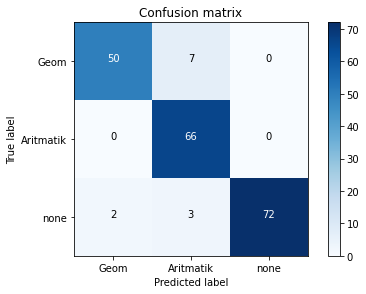

In [16]:
# Plot Confusion Matrix

class_names=np.array(['Geom','Aritmatik','none'])

cm = confusion_matrix(y_test_arg,y_preds)
plot_confusion_matrix(cm,class_names)

In [17]:
print(classification_report(y_test_arg, y_preds, target_names=['Geom','Aritmatik','none']))

              precision    recall  f1-score   support

        Geom       0.96      0.88      0.92        57
   Aritmatik       0.87      1.00      0.93        66
        none       1.00      0.94      0.97        77

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [18]:
y_preds

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0,
       1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 0,
       1, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2,
       0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2,
       0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0,
       0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 1,
       2, 2], dtype=int64)

In [19]:
## history = model.fit(X_train, y_train,epochs = 100,validation_data=(X_test,y_test))

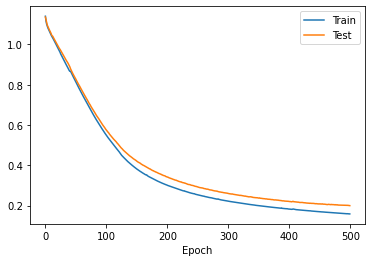

In [20]:
plt.figure()

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('Epoch')
plt.legend(['Train','Test'])
plt.show()

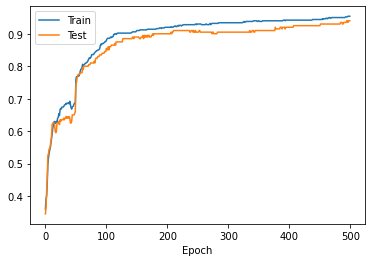

In [21]:
plt.figure()

plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.xlabel('Epoch')
plt.legend(['Train','Test'])
plt.show()

In [22]:
#### CSV test

In [23]:
csv = pd.read_csv('compare.csv',header = 0)

In [24]:
csv

,x,x1,x2,x3,x4,x5,geom,aritmatik,none
0,16.0,-16.0,-48.0,-80.0,-112.0,-144.0,0.0,1.0,0.0
1,381.0,-19.0,234.0,815.0,-864.0,233.0,0.0,0.0,1.0
2,-27.0,54.0,-108.0,216.0,-432.0,864.0,1.0,0.0,0.0
3,98.0,882.0,7938.0,71442.0,642978.0,5786802.0,1.0,0.0,0.0
4,-58.0,116.0,-232.0,464.0,-928.0,1856.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
70,-150.0,300.0,-600.0,1200.0,-2400.0,4800.0,1.0,0.0,0.0
71,99.0,101.0,103.0,105.0,107.0,109.0,0.0,1.0,0.0
72,636.0,-695.0,-714.0,314.0,-287.0,134.0,0.0,0.0,1.0
73,129.0,-247.0,62.0,263.0,-533.0,954.0,0.0,0.0,1.0


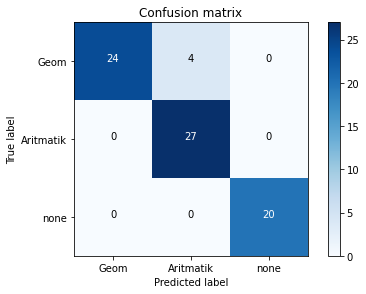

In [25]:
X_csv = csv[['x','x1','x2','x3','x4','x5']]
y_csv = csv[['geom','aritmatik','none']]
X_csv = scalar.transform(X_csv)

## Predict
y_predict_csv = model.predict_proba(X_csv)
y_preds_csv = np.argmax(y_predict_csv,axis =1)
y_test_arg_csv = np.argmax(y_csv.to_numpy(),axis = 1)

# Plot Confusion Matrix

class_names=np.array(['Geom','Aritmatik','none'])

cm = confusion_matrix(y_test_arg_csv,y_preds_csv)
plot_confusion_matrix(cm,class_names)

In [26]:
print('classification report train')
print(classification_report(y_test_arg_csv, y_preds_csv, target_names=['Geom','Aritmatik','none']))

classification report train
              precision    recall  f1-score   support

        Geom       1.00      0.86      0.92        28
   Aritmatik       0.87      1.00      0.93        27
        none       1.00      1.00      1.00        20

    accuracy                           0.95        75
   macro avg       0.96      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

